In [257]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, scale
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, roc_curve, roc_auc_score

In [278]:
def plot_raw_and_log(series: pd.Series, name=None, figsize=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize or (10, 4))
    ax1.hist(series)
    ax1.set_title(f"Raw {name}")

    ax2.hist(np.log(series))
    ax2.set_title(f"Log {name}")

In [279]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

print(f"Train shape {train_df.shape}")
print(f"Test  shape {test_df.shape}")

Train shape (73799, 19)
Test  shape (36349, 18)


In [280]:
train_df['train'] = 1
test_df['train'] = 0
test_df['default'] = np.nan

df = pd.concat([train_df, test_df])

print(f"Total shape {df.shape}")

Total shape (110148, 20)


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110148 entries, 0 to 36348
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        110

In [282]:
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
cat_cols = ['education', 'home_address', 'work_address', 'sna', 'first_time']
cat_and_bin_cols = [*bin_cols, *cat_cols]
num_cols = ['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'region_rating', 'income', 'days_pass']
target_col = 'default'

In [283]:
app_date = pd.to_datetime(df['app_date'], format='%d%b%Y')
time_pass = pd.datetime.now() - app_date
days_pass = time_pass.dt.days
df['days_pass'] = scale(days_pass)

/Users/altera/test/skillfactory_datascience/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [284]:
df['education'].value_counts()
df['education'].fillna('SCH', inplace=True)

In [285]:
for col in cat_and_bin_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

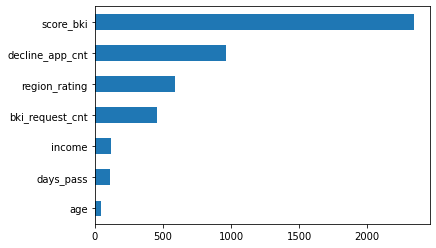

In [286]:
train_df = df[df['train'] == 1]
f_val, p_val = f_classif(train_df[num_cols], train_df[target_col])
pd.Series(f_val, index=num_cols).sort_values().plot(kind='barh')

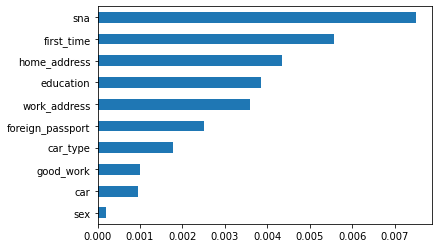

In [287]:

train_df = df[df['train'] == 1]
f_val = mutual_info_classif(train_df[cat_and_bin_cols], train_df[target_col], discrete_features=True)
pd.Series(f_val, index=cat_and_bin_cols).sort_values().plot(kind="barh")

In [288]:
df['age'] = np.log(df['age'])
df['income'] = np.log(df['income'])

In [289]:
for col in num_cols:
    df[col] = scale(df[col])

In [290]:

df = pd.get_dummies(df, columns=cat_cols)
df.head().T

,0,1,2,3,4
client_id,25905,63161,25887,16222,101655
app_date,01FEB2014,12MAR2014,01FEB2014,23JAN2014,18APR2014
sex,1,0,1,0,1
age,1.70741,1.53802,-1.39461,1.17174,0.833308
car,1,0,1,0,0
car_type,1,0,0,0,0
decline_app_cnt,-0.341893,-0.341893,2.16094,-0.341893,-0.341893
good_work,0,0,0,0,1
score_bki,-0.208688,0.745419,0.993988,-0.306243,1.32122
bki_request_cnt,-0.443335,0.438921,-0.443335,-0.00220668,-0.443335


In [291]:
df.drop(columns=['app_date'], inplace=True)

/Users/altera/test/skillfactory_datascience/venv/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


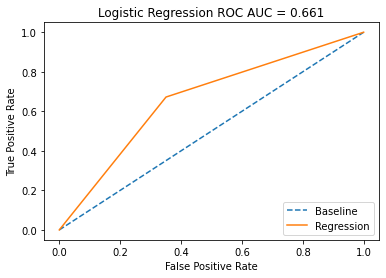

F1 score 0.6649098766733424


In [292]:
train_df = df[df['train'] == 1]
train_df.drop(columns=['client_id'], inplace=True)

class0 = train_df[train_df[target_col] == 0]
class1 = train_df[train_df[target_col] == 1]

class0_1, class0_2 = train_test_split(class0, train_size=class1.shape[0])

train_df = pd.concat([class0_1, class1])

X_train, X_test, y_train, y_test = train_test_split(
    train_df.drop(columns=[target_col]),
    train_df[target_col],
    test_size=0.5,
    random_state=123,
)

model = LogisticRegression(C=1, random_state=633, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

print("F1 score", f1_score(y_test, y_pred))

In [293]:
def predict_and_save(model, df):
    y_pred = model.predict_proba(df.drop(columns=['client_id']))

    sub_df = test_df[['client_id']]
    sub_df['default'] = list(map(lambda x: x[1], y_pred))
    sub_df.to_csv('submissions.csv', index=False)
    return sub_df

In [294]:
test_df = df[df['train'] == 0]
test_df = test_df.drop(columns=[target_col])
predict_and_save(model, test_df)

/Users/altera/test/skillfactory_datascience/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,client_id,default
0,74835,0.198907
1,17527,0.830405
2,75683,0.306001
3,26883,0.433035
4,28862,0.146265
...,...,...
36344,83775,0.772102
36345,106254,0.086056
36346,81852,0.757828
36347,1971,0.608165
